<a href="https://colab.research.google.com/github/Aleena24/Computer-Vision/blob/main/lab8_derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/research_dataset/BSD100/170057.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# First Order Derivative - Sobel Edge Detector

* First order derivative methods detect edges by looking for the maximum and minimum in the first derivative of the image. Essentially, they highlight regions where the intensity of the image changes sharply, which are typically associated with edges. The most common first-order derivative method is the Sobel operator.

In [7]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobelx, sobely)

# Second Order Derivative - Laplacian

* Second order derivative methods, such as the Laplacian operator, detect edges by identifying zero-crossings in the second derivative of the image. A zero-crossing indicates a point where the rate of change of intensity changes sign, which often corresponds to the center of an edge.

In [8]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

laplacian_abs = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian_abs)

# Optimum Edge Detection - Canny
* An optimal edge detector would accurately detect all true edges, accurately localize them, and only detect each edge once. Canny edge detection is often considered close to an "optimum" edge detection method due to its criteria for noise reduction, edge detection, and edge localization.

In [9]:
canny = cv2.Canny(img, 100, 200)

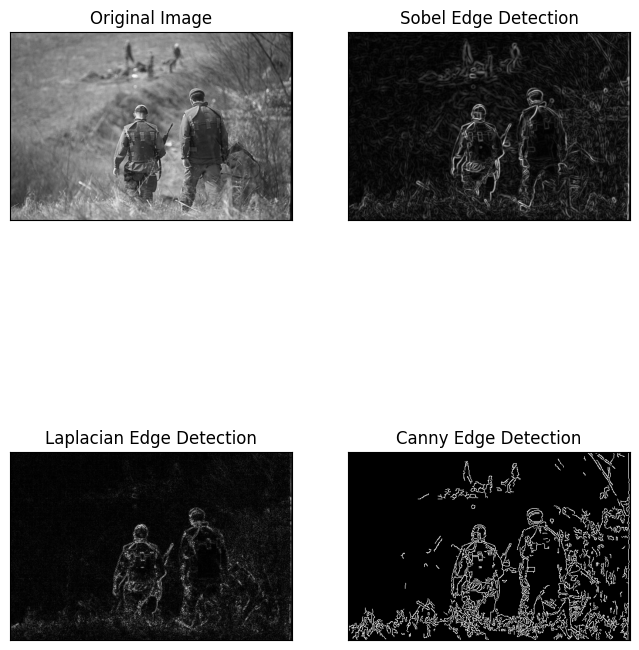

In [10]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(laplacian_8u, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()

*  First order methods are particularly good at detecting large, pronounced edges. However, they can be sensitive to noise, as noise can also cause rapid changes in intensity.
* Second order methods are sensitive to finer edges than first order methods and can more accurately localize edges because they seek the point where the rate of change of intensity peaks. However, they are even more sensitive to noise than first order methods because noise can significantly affect the rate of change of intensity.
* The Canny edge detector is designed to be an optimal balance between various factors such as detection and localization accuracy, and robustness to noise. It typically produces well-defined edges and is less likely to be fooled by noise or subtle changes in intensity compared to the first and second order methods.

** first order methods are useful for detecting prominent edges but are sensitive to noise, second order methods are better for fine edge detection but even more sensitive to noise, and methods like the Canny edge detector aim to provide a balanced, robust solution for edge detection across a variety of conditions.